In [74]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

# Tipo de Generacion

In [125]:
#Ruta de la carpeta dondese encuentran los csv de REE
TipoGeneracion = 'C:\\Users\\Marcos\\Ironhack\\Projects\\Recurrent-Neural-Networks-for-Electricity-Price-Prediction\\Data\\TipoGeneracion'

#Nos desplazamos a esa carpeta
os.chdir(TipoGeneracion)

#Obtenemos una lista con todos los archivos de esa carpeta
csvlists = os.listdir()

#concatenamos conviertiendolos con pandas todos estos dataset en uno unico solo
df = pd.concat([pd.read_csv(csv,sep=';')  for csv in csvlists])

#Eliminamos las posibles filas duplicadas
df.drop_duplicates(keep='first',inplace=True )

#convertimos la columna datetime a formato datetime
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)

#pivotamosla tabla para poder trabajar con ella
df_pivot = pd.pivot_table(df,values='value',index='datetime', columns = 'name',dropna=True,fill_value = 0)

In [126]:
#Comprobamos que no haya filas duplicadas.
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [id, name, geoid, geoname, value, datetime]
Index: []

In [127]:
#Comprobamos que no haya filas duplicadas.
df_pivot[df_pivot.duplicated(keep=False)]

Empty DataFrame
Columns: [Generación medida Biogás, Generación medida Biomasa, Generación medida Ciclo combinado, Generación medida Derivados del petróleo ó carbón, Generación medida Energía residual, Generación medida Eólica terrestre, Generación medida Fuel, Generación medida Gas Natural Cogeneración, Generación medida Hidráulica UGH, Generación medida Hidráulica no UGH, Generación medida Hulla antracita, Generación medida Hulla sub-bituminosa, Generación medida Nuclear, Generación medida Océano y geotérmica, Generación medida Residuos domésticos y similares, Generación medida Residuos varios, Generación medida Solar fotovoltaica, Generación medida Solar térmica, Generación medida Subproductos minería, Generación medida Turbinación bombeo, Generación medida Térmica no renovable, Generación medida Térmica renovable, Generación medida total tipo producción]
Index: []

[0 rows x 23 columns]

In [128]:
#Comprobamos que no falten fechas

AllDates = pd.date_range(start='2014-12-31 23:00:00+00:00', end='2020-12-31 22:00:00+00:00',freq = 'H')

AllDates.difference(df_pivot.index)

DatetimeIndex(['2019-12-31 23:00:00+00:00'], dtype='datetime64[ns, UTC]', freq=None)

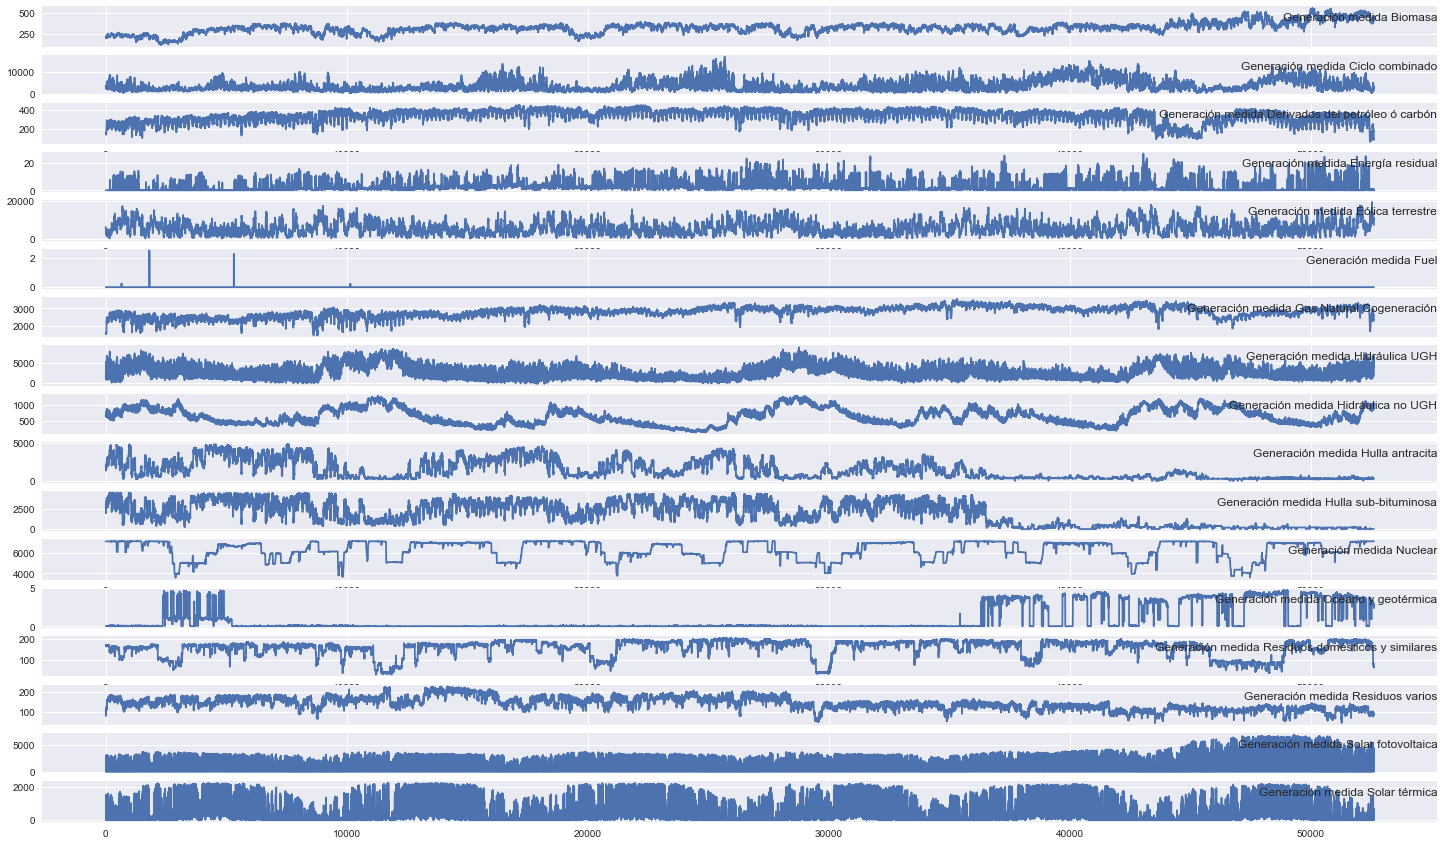

In [132]:
values = df_pivot.values

groups = range(1,18)
i = 1

# plot each column
plt.figure(figsize = (25, 15))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df_pivot.columns[group], y=0.5, loc='right')
    i += 1
    
plt.show()

In [89]:
df_pivot.groupby(pd.to_datetime(df.index).strftime('%b-%d'))['Date_Value'].max()

ValueError: Grouper and axis must be same length

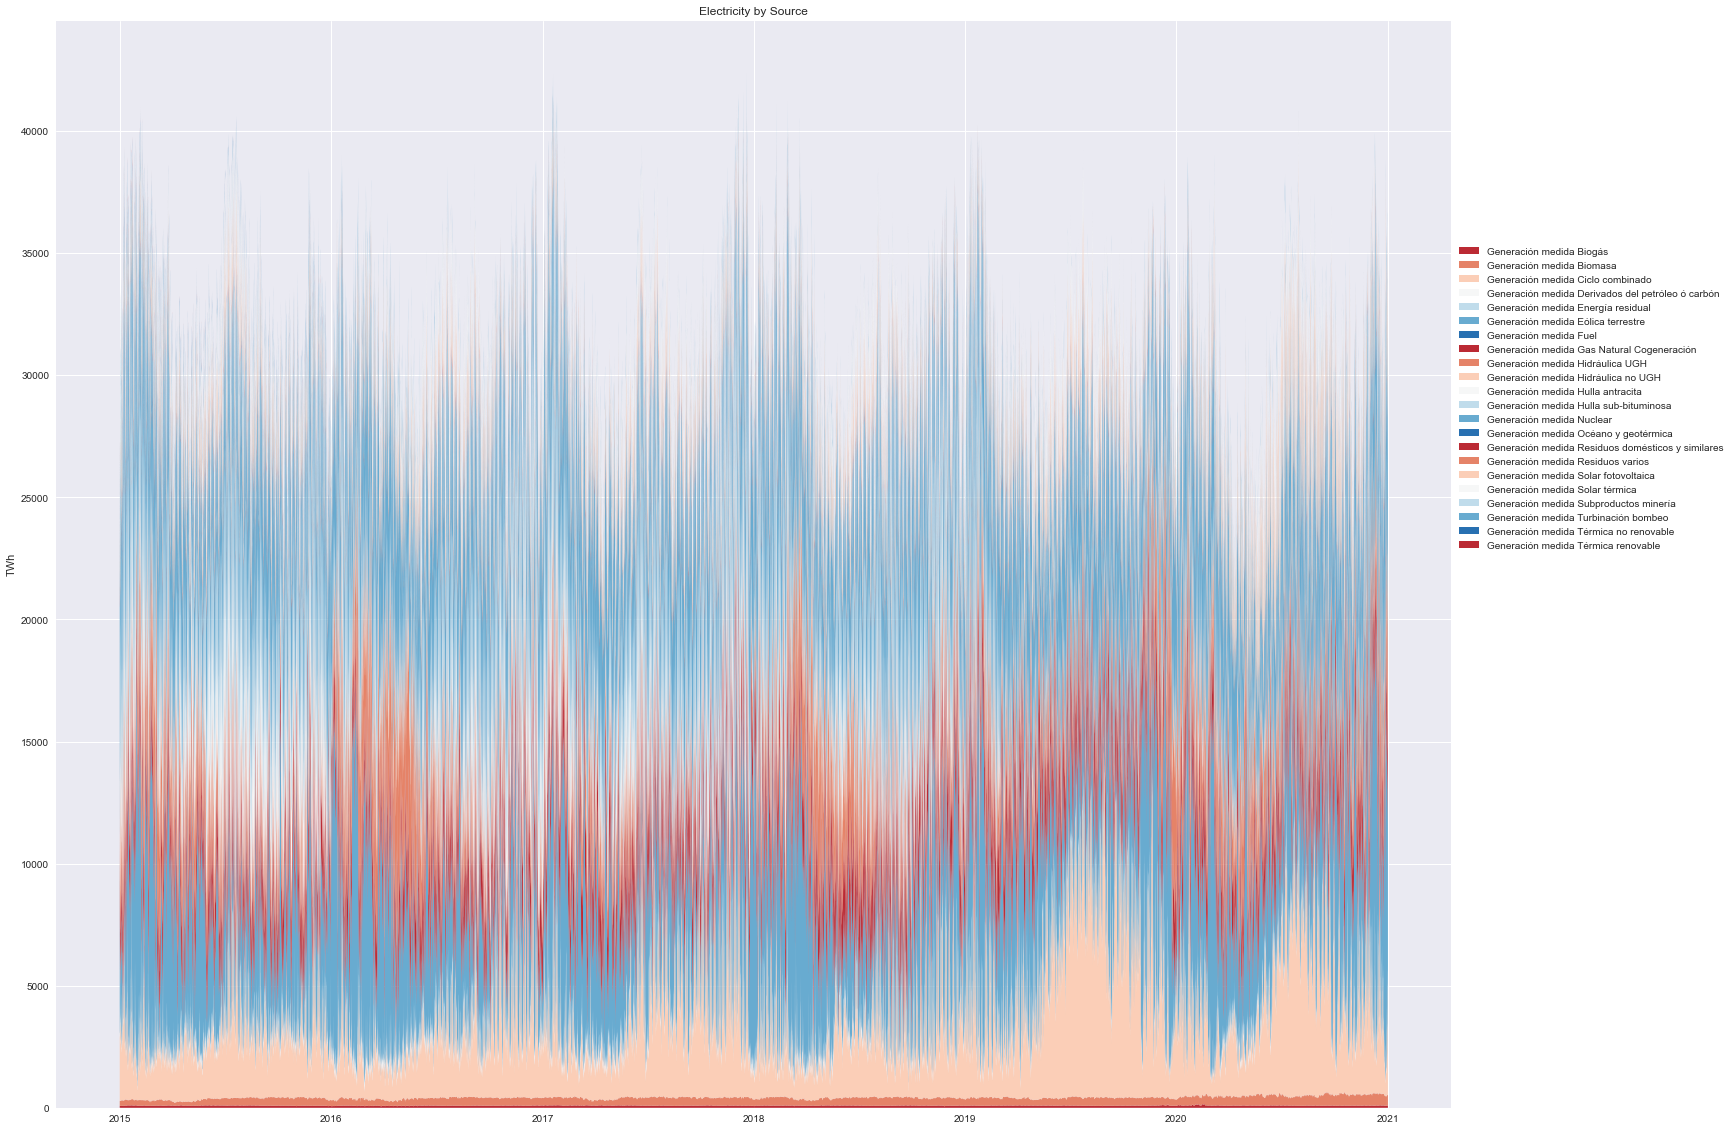

In [91]:
#Ploteamos la informacion

colors = sns.color_palette("RdBu", 7)
labels= df_pivot.drop('Generación medida total tipo producción',axis=1).columns


plt.rcParams['figure.figsize'] = (25,20)
plt.stackplot(df_pivot.index ,*[np.array(df_pivot[col]) for col in labels], labels=labels, colors=colors);

plt.legend(loc = "upper center", bbox_to_anchor=(1.1, 0.8), ncol=1)
plt.title('Electricity by Source')
plt.ylabel('TWh')
plt.show()

In [ ]:
#Ploteamos la informacion por meses

df_month = df_pivot.groupby(df_pivot.index.strftime('%y-%m')).sum()

colors = sns.color_palette("RdBu", 7)
labels= df_month.drop('Generación medida total tipo producción',axis=1).columns


plt.rcParams['figure.figsize'] = (25,20)
plt.stackplot(df_month.index ,*[np.array(df_month[col]) for col in labels], labels=labels, colors=colors);

plt.legend(loc = "upper center", bbox_to_anchor=(1.1, 0.8), ncol=1)
plt.title('Electricity by Source')
plt.ylabel('TWh')
plt.show()

## Producciones agrupadas 

In [92]:
df_produccion = pd.DataFrame()

df_produccion['Hidráulica'] = df_pivot['Generación medida Hidráulica UGH'] + df_pivot['Generación medida Hidráulica no UGH']
df_produccion['Eólica'] = df_pivot['Generación medida Eólica terrestre']
df_produccion['Solar Fotovoltaica'] =   df_pivot['Generación medida Solar fotovoltaica'] 
df_produccion['Solar Térmica'] =  df_pivot[ 'Generación medida Solar térmica']   
df_produccion['Otras Renovables'] = df_pivot['Generación medida Térmica renovable']+ df_pivot['Generación medida Biogás']+df_pivot['Generación medida Biomasa']+df_pivot['Generación medida Océano y geotérmica']
df_produccion['Residuos Renovables'] = df_pivot['Generación medida Residuos domésticos y similares']+df_pivot['Generación medida Solar térmica']

df_produccion['Nuclear'] = df_pivot['Generación medida Nuclear']
df_produccion['Turbinación bombeo'] = df_pivot['Generación medida Turbinación bombeo']
df_produccion['Ciclo combinado'] = df_pivot['Generación medida Ciclo combinado']
df_produccion['Carbón'] = df_pivot['Generación medida Hulla sub-bituminosa']+df_pivot['Generación medida Hulla antracita']
df_produccion['Fuel-gas'] = df_pivot['Generación medida Fuel']
df_produccion['Cogeneración'] = df_pivot['Generación medida Gas Natural Cogeneración'] + df_pivot['Generación medida Energía residual']
df_produccion['Residuos no renovables'] = df_pivot['Generación medida Subproductos minería'] + df_pivot['Generación medida Derivados del petróleo ó carbón']


In [137]:
# df_pivot['Generación medida Biogás']2020-12-30 03:00:00+00:00    1510.996

<AxesSubplot:xlabel='datetime'>

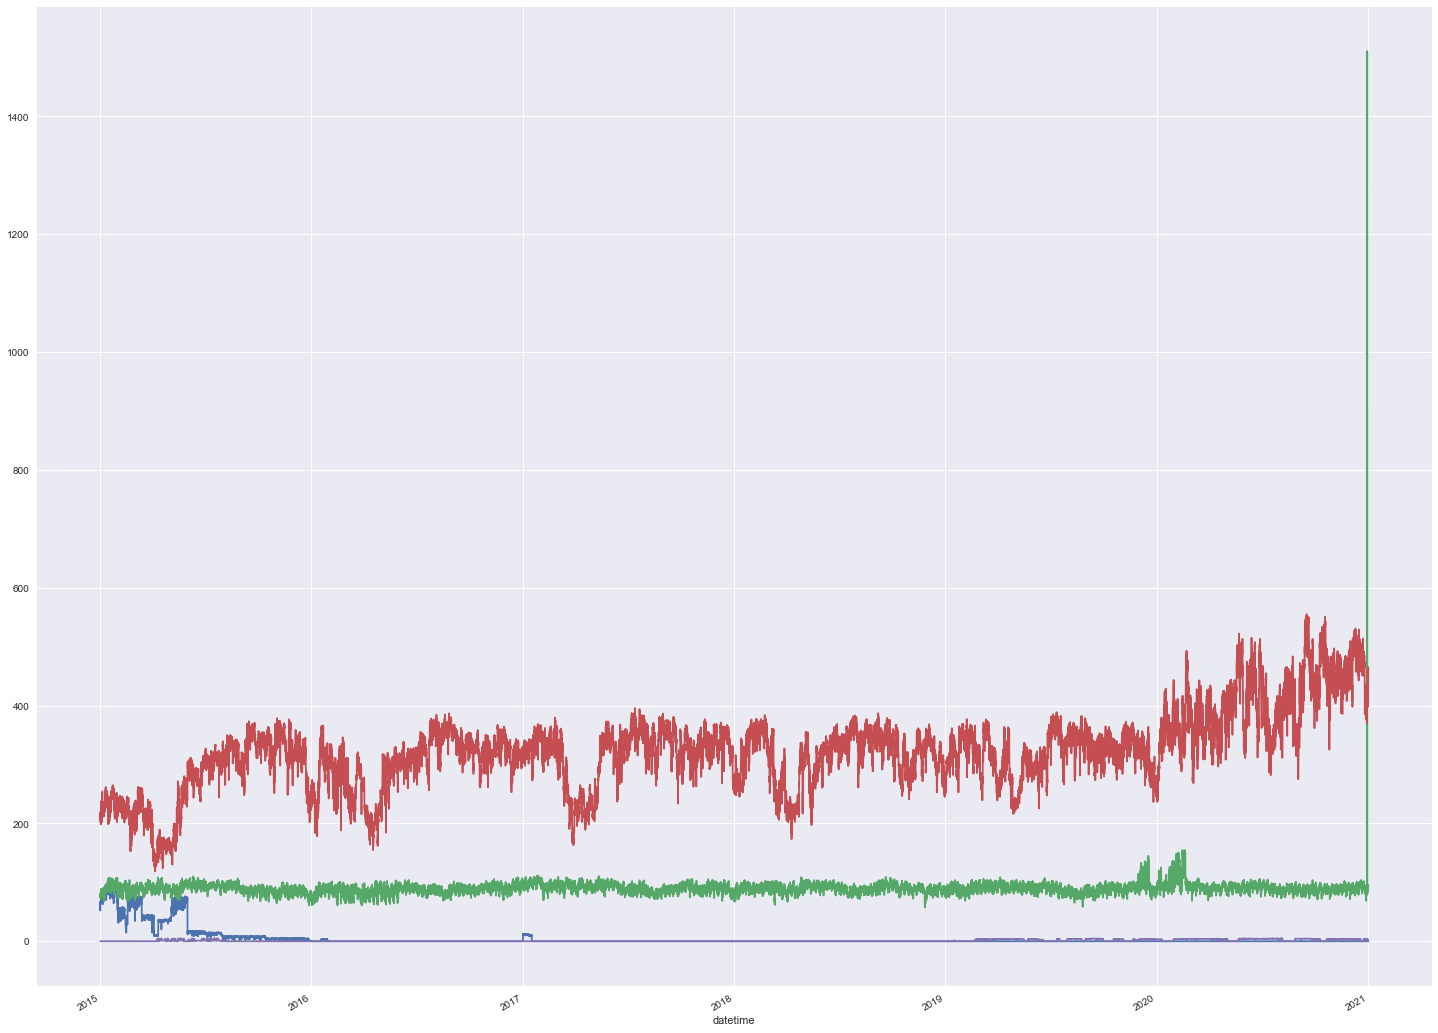

In [133]:
df_pivot['Generación medida Térmica renovable'].plot()
df_pivot['Generación medida Biogás'].plot()
df_pivot['Generación medida Biomasa'].plot()
df_pivot['Generación medida Océano y geotérmica'].plot()

In [93]:
df_produccion.head()

Hidráulica    Eólica  Solar Fotovoltaica  \
datetime                                                              
2014-12-31 23:00:00+00:00    2980.574  6283.000               0.047   
2015-01-01 00:00:00+00:00    2668.203  5788.224               0.050   
2015-01-01 01:00:00+00:00    2382.211  5368.731               0.045   
2015-01-01 02:00:00+00:00    1690.844  5150.656               0.051   
2015-01-01 03:00:00+00:00    1556.983  4835.700               0.043   

                           Solar Térmica  Otras Renovables  \
datetime                                                     
2014-12-31 23:00:00+00:00         15.802           360.655   
2015-01-01 00:00:00+00:00         15.815           359.722   
2015-01-01 01:00:00+00:00         15.799           358.945   
2015-01-01 02:00:00+00:00         15.774           351.918   
2015-01-01 03:00:00+00:00          7.862           347.058   

                           Residuos Renovables   Nuclear  Turbinación bombeo  \
datetime                                                                       
2014-12-31 23:00:00+00:00              186.523  7110.440              75.629   
2015-01-01 00:00:00+00:00              186.340  7107.798              71.806   
2015-01-01 01:00:00+00:00              187.789  7113.883              25.789   
2015-01-01 02:00:00+00:00              186.181  7110.093              82.638   
2015-01-01 03:00:00+00:00              178.637  7110.581             160.241   

                           Ciclo combinado    Carbón  Fuel-gas  Cogeneración  \
datetime                                                                       
2014-12-31 23:00:00+00:00         3416.260  5069.456       0.0      1533.928   
2015-01-01 00:00:00+00:00         3775.267  5004.822       0.0      1527.712   
2015-01-01 01:00:00+00:00         3452.924  4817.315       0.0      1515.046   
2015-01-01 02:00:00+00:00         2907.244  4292.156       0.0      1514.132   
2015-01-01 03:00:00+00:00         2721.058  3923.423       0.0      1513.983   

                           Residuos no renovables  
datetime                                           
2014-12-31 23:00:00+00:00                 153.647  
2015-01-01 00:00:00+00:00                 149.386  
2015-01-01 01:00:00+00:00                 148.494  
2015-01-01 02:00:00+00:00                 151.826  
2015-01-01 03:00:00+00:00                 147.574

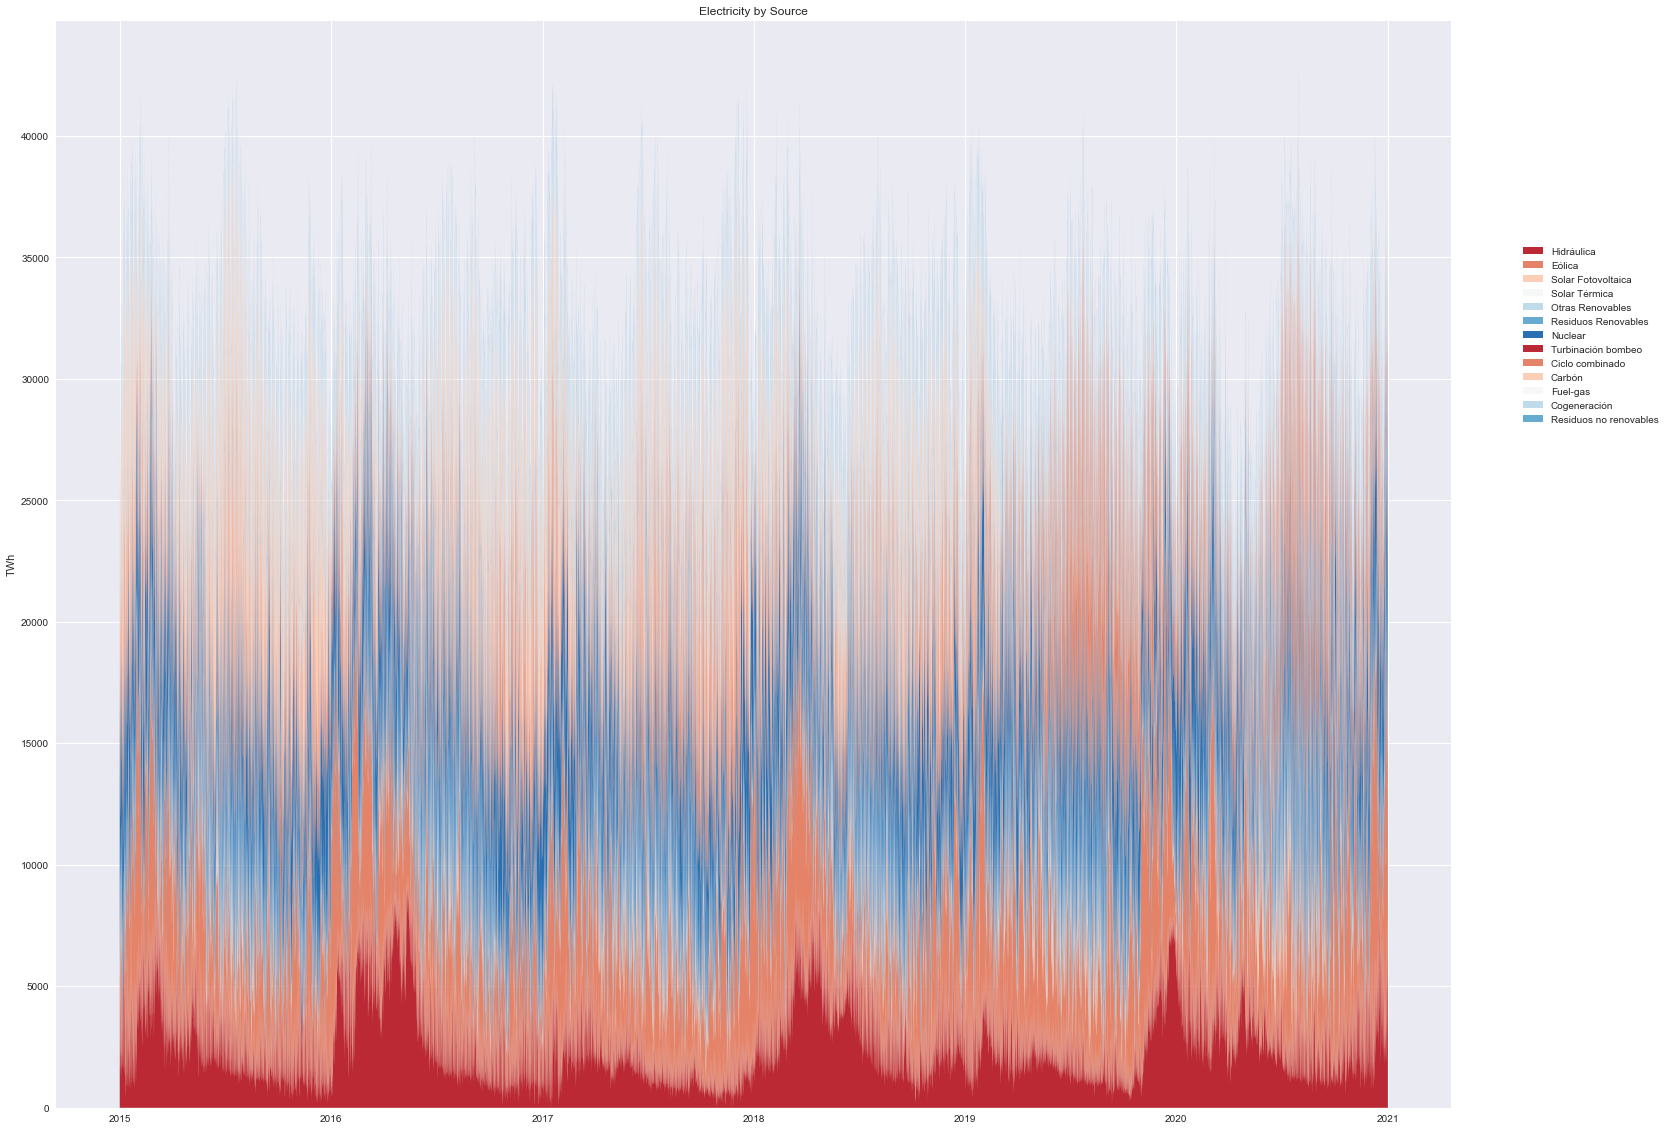

In [94]:
#Ploteamos la informacion

colors = sns.color_palette("RdBu", 7)
labels= df_produccion.columns

plt.rcParams['figure.figsize'] = (25,20)
plt.stackplot(df_produccion.index ,*[np.array(df_produccion[col]) for col in labels], labels=labels, colors=colors);

plt.legend(loc = "upper center", bbox_to_anchor=(1.1, 0.8), ncol=1)
plt.title('Electricity by Source')
plt.ylabel('TWh')
plt.show()

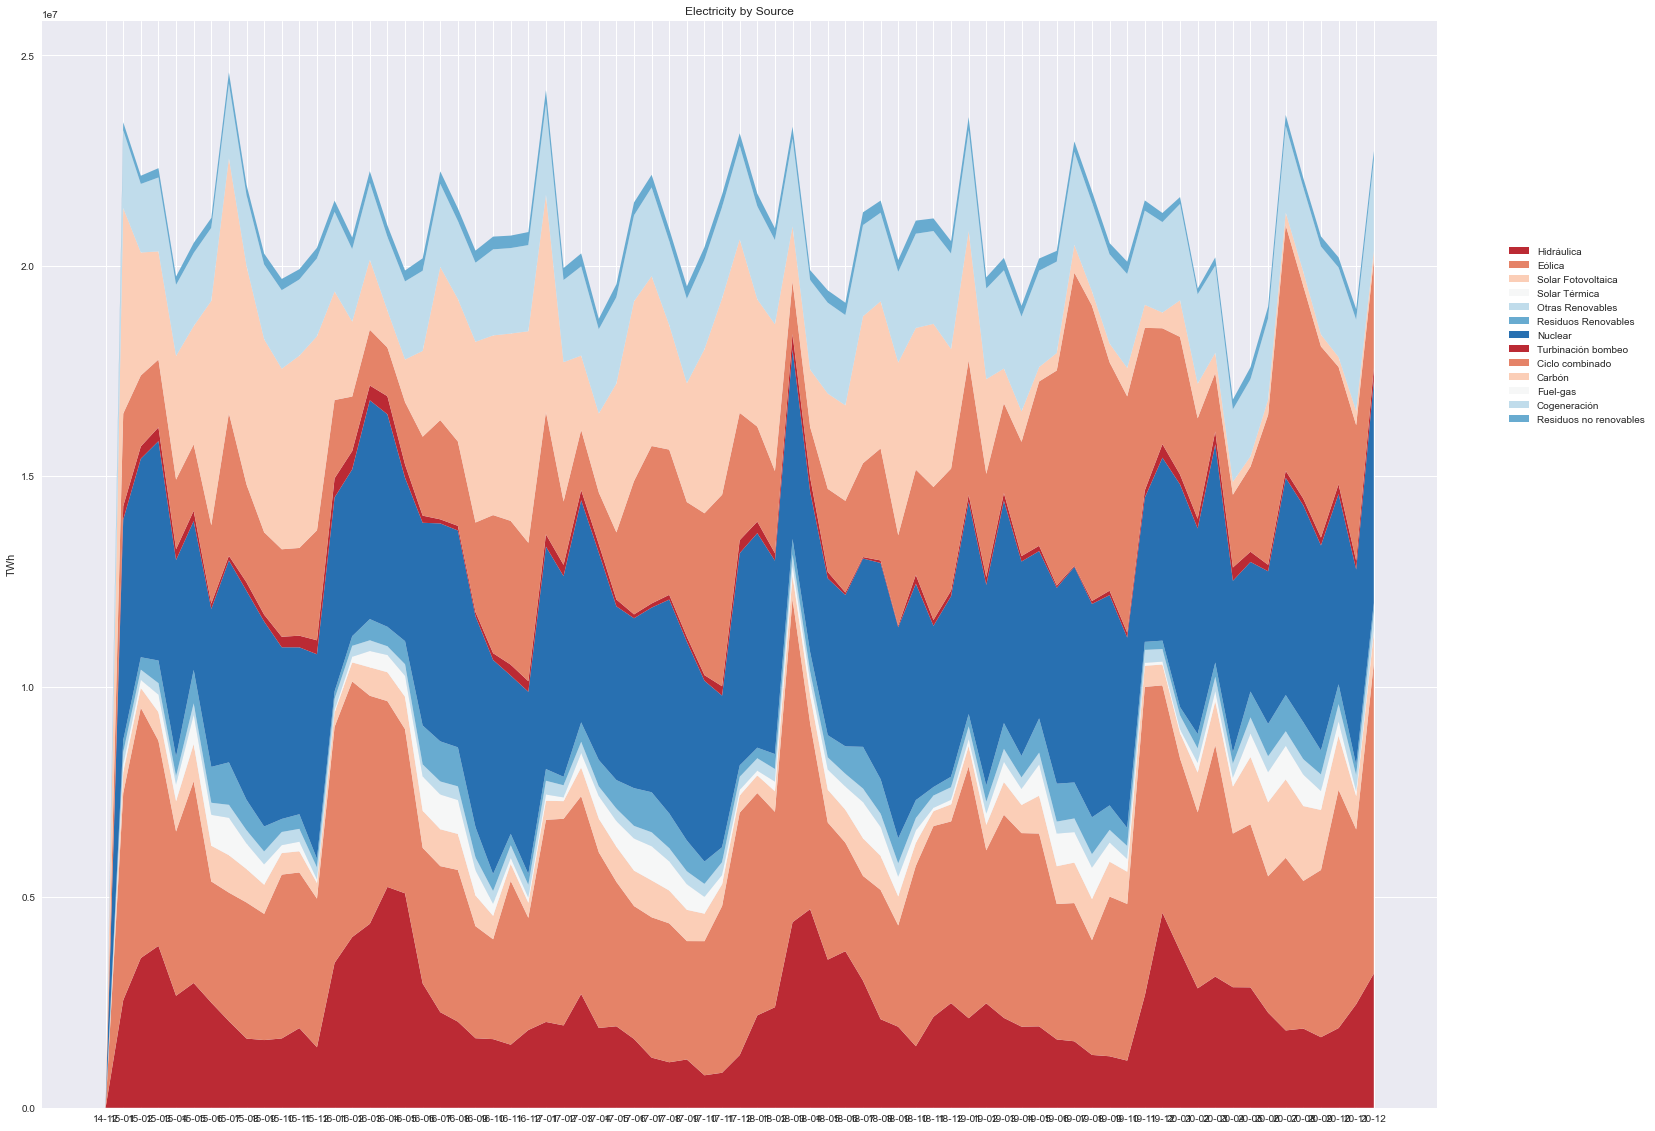

In [95]:
#Ploteamos la informacion por meses

df_month = df_produccion.groupby(df_produccion.index.strftime('%y-%m')).sum()

colors = sns.color_palette("RdBu", 7)
labels= df_month.columns


plt.rcParams['figure.figsize'] = (25,20)
plt.stackplot(df_month.index ,*[np.array(df_month[col]) for col in labels], labels=labels, colors=colors);

plt.legend(loc = "upper center", bbox_to_anchor=(1.1, 0.8), ncol=1)
plt.title('Electricity by Source')
plt.ylabel('TWh')
plt.show()

# Precio Spot España

In [96]:
#Ruta de la carpeta dondese encuentran los csv de REE
PrecioSportEs = 'C:\\Users\\Marcos\\Ironhack\\Projects\\Recurrent-Neural-Networks-for-Electricity-Price-Prediction\\Data\\PrecioSpotEs'

#Nos desplazamos a esa carpeta
os.chdir(PrecioSportEs)

#Obtenemos una lista con todos los archivos de esa carpeta
csvlists = os.listdir()

#concatenamos conviertiendolos con pandas todos estos dataset en uno unico solo
df = pd.read_csv(csvlists[0],sep=';') 

#Eliminamos las posibles filas duplicadas
df.drop_duplicates(keep='first',inplace=True )

#convertimos la columna datetime a formato datetime
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)

df

id                        name  geoid   geoname  value  \
0       600  Precio mercado SPOT Diario      1  Portugal  50.10   
1       600  Precio mercado SPOT Diario      2   Francia  53.48   
2       600  Precio mercado SPOT Diario      3     Price  50.10   
3       600  Precio mercado SPOT Diario      1  Portugal  48.10   
4       600  Precio mercado SPOT Diario      2   Francia  51.93   
...     ...                         ...    ...       ...    ...   
190896  600  Precio mercado SPOT Diario      2   Francia  48.43   
190897  600  Precio mercado SPOT Diario      3     Price  48.76   
190898  600  Precio mercado SPOT Diario      1  Portugal  49.64   
190899  600  Precio mercado SPOT Diario      2   Francia  49.64   
190900  600  Precio mercado SPOT Diario      3     Price  49.64   

                        datetime  
0      2014-12-31 23:00:00+00:00  
1      2014-12-31 23:00:00+00:00  
2      2014-12-31 23:00:00+00:00  
3      2015-01-01 00:00:00+00:00  
4      2015-01-01 00:00:00+00:00  
...                          ...  
190896 2014-12-31 21:00:00+00:00  
190897 2014-12-31 21:00:00+00:00  
190898 2014-12-31 22:00:00+00:00  
190899 2014-12-31 22:00:00+00:00  
190900 2014-12-31 22:00:00+00:00  

[190901 rows x 6 columns]

In [97]:
df_pivot = pd.pivot_table(df, values='value',index='datetime', columns = 'geoname')

In [98]:
df_spot_es = df_pivot.drop(['Alemania','Bélgica','Francia','Italia','Países Bajos', 'Portugal', 'Reino Unido'],axis=1)

In [99]:
df_spot_es.head()

geoname                    Price
datetime                        
2014-12-30 23:00:00+00:00  48.76
2014-12-31 00:00:00+00:00  43.43
2014-12-31 01:00:00+00:00  37.98
2014-12-31 02:00:00+00:00  34.94
2014-12-31 03:00:00+00:00  32.00

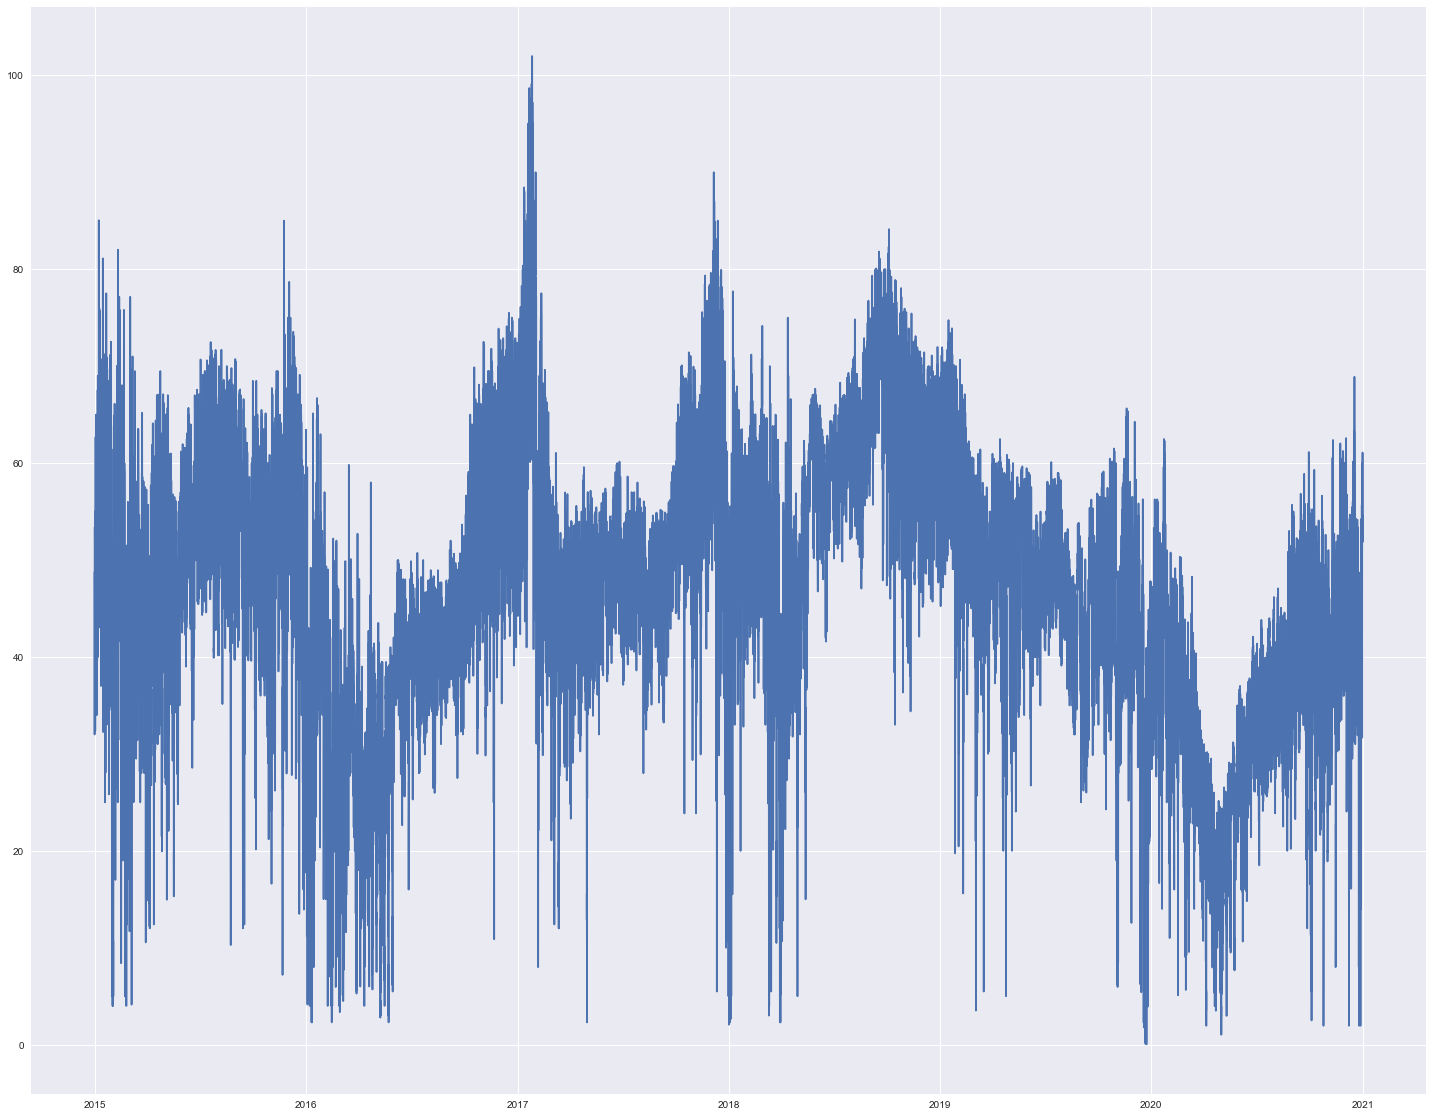

In [100]:
plt.plot(df_spot_es)

# Demanda Electrica España

In [101]:
#Ruta de la carpeta dondese encuentran los csv de REE
Demanda = 'C:\\Users\\Marcos\\Ironhack\\Projects\\Recurrent-Neural-Networks-for-Electricity-Price-Prediction\\Data\\Demanda'

#Nos desplazamos a esa carpeta
os.chdir(Demanda)

#Obtenemos una lista con todos los archivos de esa carpeta
csvlists = os.listdir()

#concatenamos conviertiendolos con pandas todos estos dataset en uno unico solo
df = pd.read_csv(csvlists[0],sep=';') 

#Eliminamos las posibles filas duplicadas
df.drop_duplicates(keep='first',inplace=True )

#convertimos la columna datetime a formato datetime
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)

df_demanda = pd.pivot_table(df, values='value',index='datetime', columns = 'name')

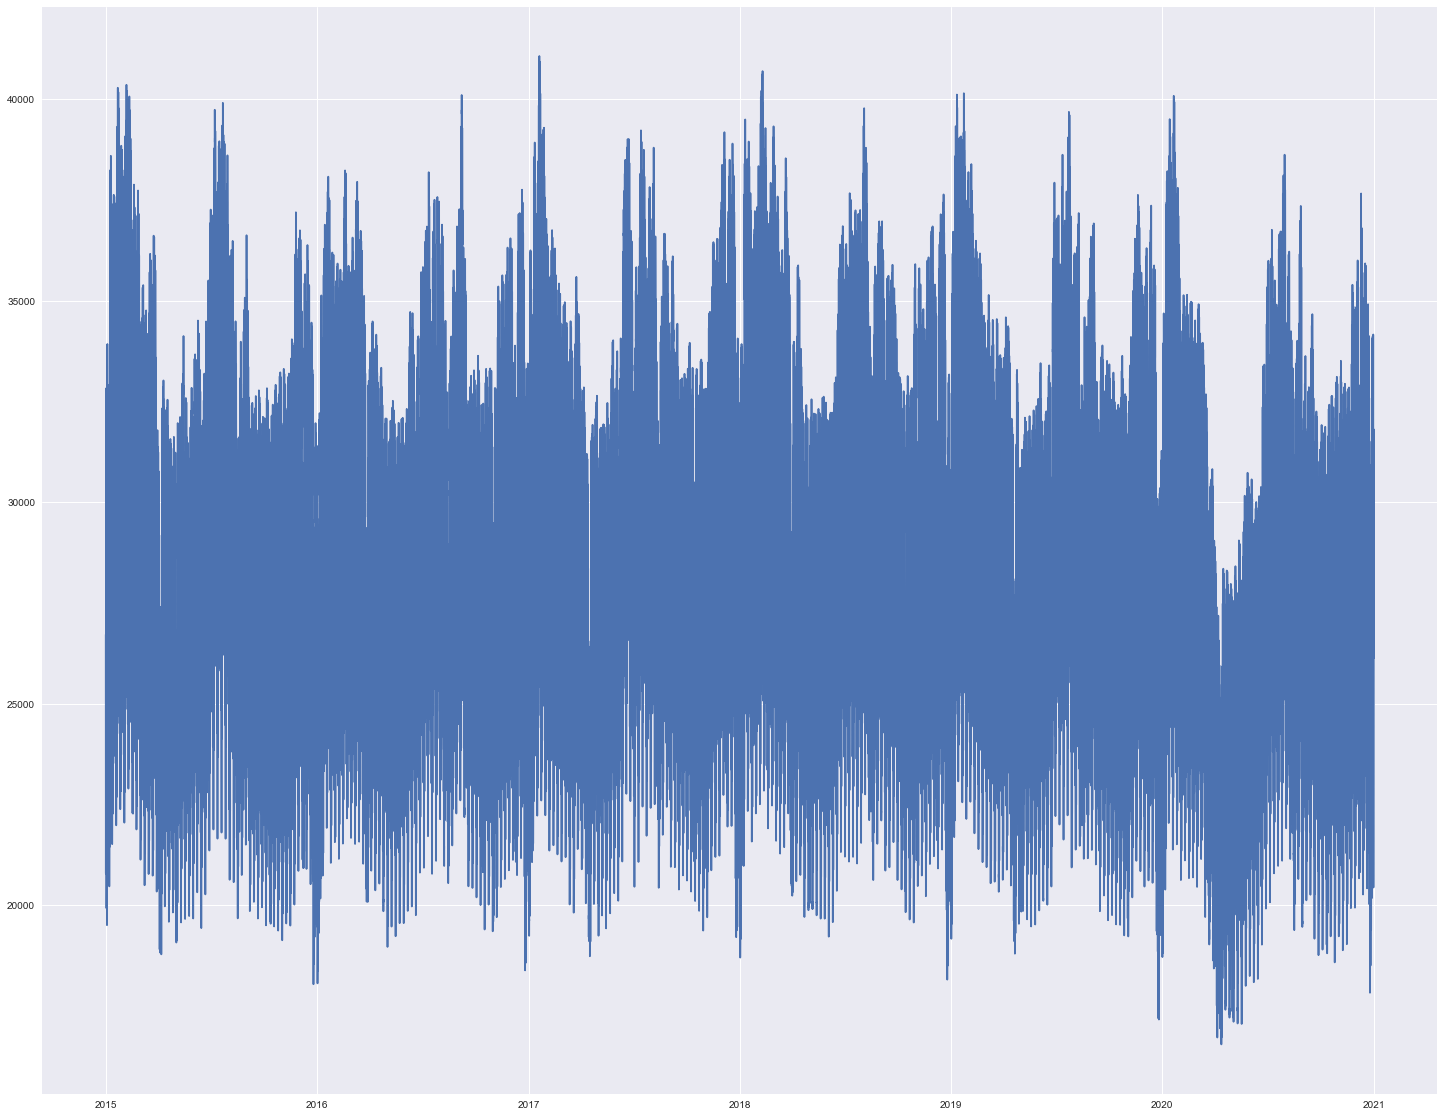

In [102]:
plt.plot(df_demanda)

# Emisiones de CO2

In [103]:
#Ruta de la carpeta donde se encuentran los csv de REE
Demanda = 'C:\\Users\\Marcos\\Ironhack\\Projects\\Recurrent-Neural-Networks-for-Electricity-Price-Prediction\\Data\\CO2'

#Nos desplazamos a esa carpeta
os.chdir(Demanda)

#Obtenemos una lista con todos los archivos de esa carpeta
csvlists = os.listdir()

In [104]:
#Cargamos el Dataset con el precio de EUASpot European Emission Allowance
df = pd.read_excel('eua ttf.xlsx')

#Nos quedamos con las columnas de tiempo y el valor
df = df.iloc[:,:2]
#Le ponemos un nombre a la columna del tiempo
df.rename(columns={'Unnamed: 0':'datetime'},inplace = True)

#Creamos un rango de tiempos diarios
df_dates = pd.DataFrame(pd.date_range(start='2015-01-01', end='2021-07-19', freq ='D'),columns=['seriesdatetime'])

#vemos que en el dataset faltan valores estos son los dias en los que no hay mercado spot (Sabados, Domingos y Festivos)
df_eua = df_dates.merge(df, how='left',left_on='seriesdatetime', right_on='datetime')

In [105]:
df_eua = df_eua[['seriesdatetime','EUA SPOT']].fillna(method='ffill').fillna(method='bfill')

df_eua.rename(columns={'seriesdatetime':'datetime'},inplace = True)

In [106]:
#Hay que pasar estos valores diarios a 24 horas

#Creamos un rango de fechas horarias que se ajusten a nuestros datos
df_dates = pd.date_range(start='2015-01-01 00:00:00+00:00', end='2021-07-19 00:00:00+00:00',freq = 'H')
#los metemos en un DataFrame para poder hacer el join
df_dates = pd.DataFrame(df_dates,columns=['hourlydatetime'])

#Convertimos al mismo formato el tiempo del DataFrame
df_eua['datetime'] = pd.to_datetime(df_eua['datetime'], utc=True)

#Los unimos en la hora 00:00 de cada dia y rellenamos el resto de valores del dia con el mismo valor
df_eua = df_dates.merge(df_eua, how='left',left_on='hourlydatetime', right_on='datetime').fillna(method='ffill').fillna(method='bfill')

df_eua.drop('datetime',axis=1,inplace=True)
df_eua.rename(columns={'hourlydatetime':'datetime'},inplace = True)
df_eua.set_index('datetime',inplace=True)

<AxesSubplot:xlabel='datetime', ylabel='EUA SPOT'>

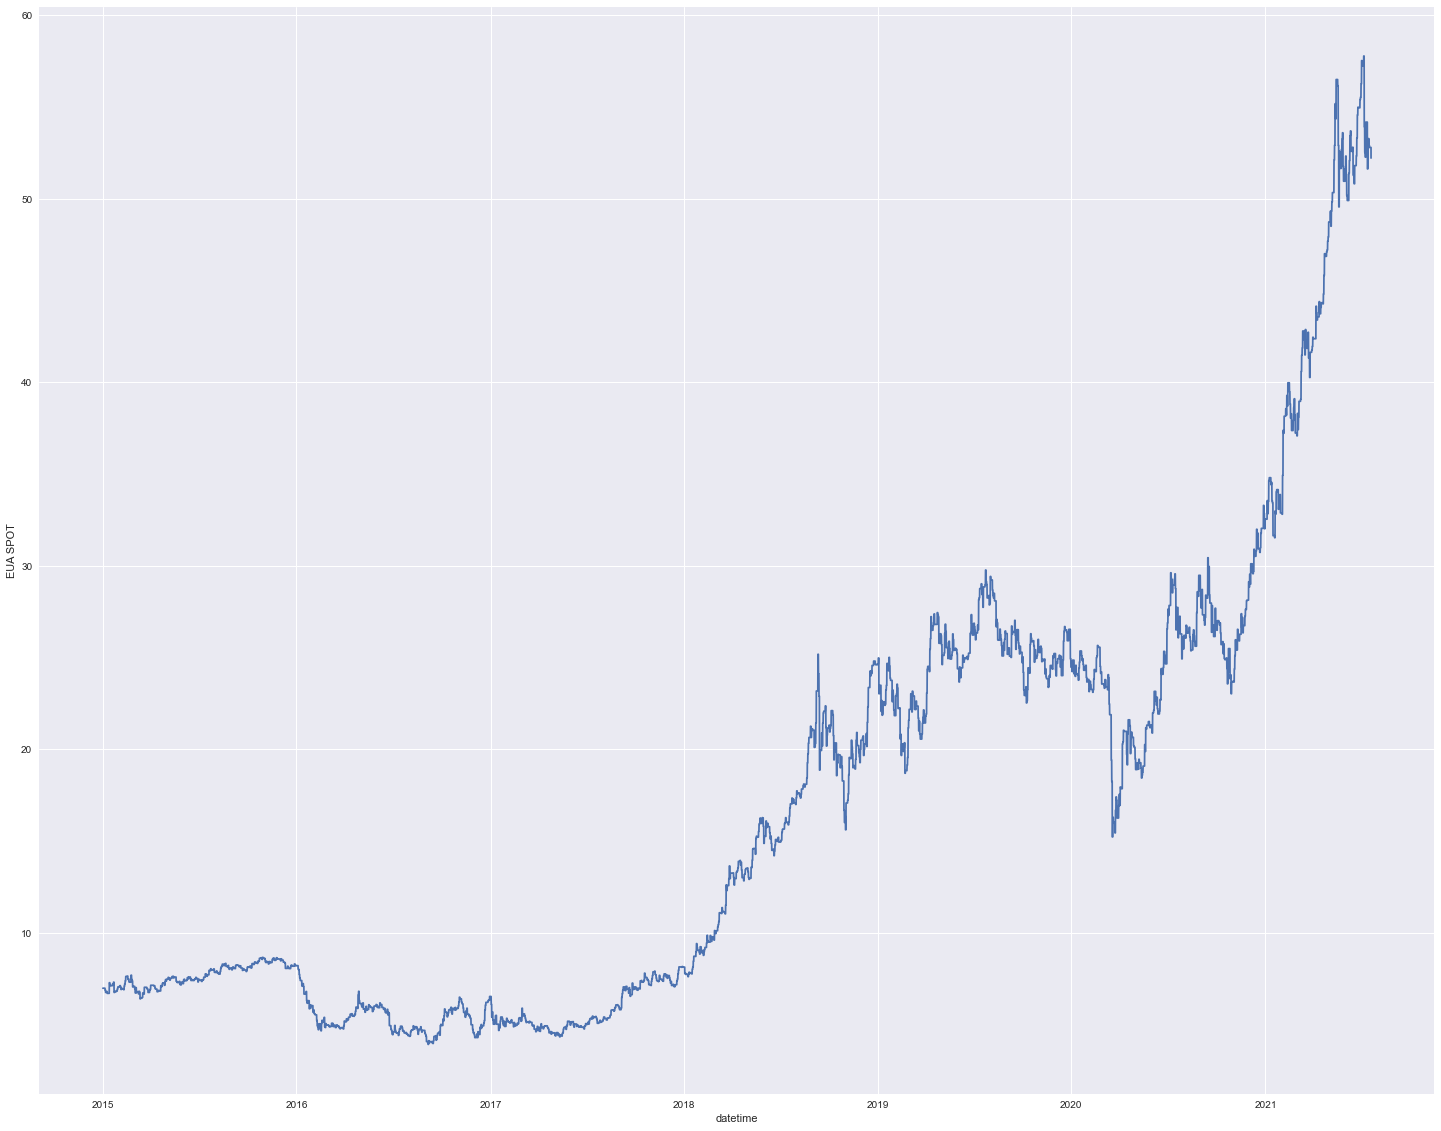

In [107]:
sns.lineplot(data=df_eua, x='datetime',y='EUA SPOT')

In [108]:
#No ejecutar
#Aqui cremaos un rango de Sabados y domingos para comprobar que sean esos dias los que faltan y no otros
sat = pd.date_range(start='2015-01-01', end='2021-07-19', freq ='W-SAT')
sun = pd.date_range(start='2015-01-01', end='2021-07-19', freq ='W-SUN')
df_weekends = pd.DataFrame(sat.union(sun),columns=['weekends'])
df_eua = df_eua.merge(df_weekends, how='left',left_on='seriesdatetime', right_on='weekends')
df_eua['weekends'] = df_eua['weekends'].apply(lambda row:True if type(row)==pd.Timestamp else False)
#Podemos filtrar y verlo por nosotros mismos que solo faltan sabados y domingo y festivos.

KeyError: 'seriesdatetime'

# Gas Natural

In [109]:
#Ruta de la carpeta donde se encuentran los csv de REE
Demanda = 'C:\\Users\\Marcos\\Ironhack\\Projects\\Recurrent-Neural-Networks-for-Electricity-Price-Prediction\\Data\\CO2'

#Nos desplazamos a esa carpeta
os.chdir(Demanda)

#Obtenemos una lista con todos los archivos de esa carpeta
csvlists = os.listdir()

In [110]:
#Cargamos el Dataset con el precio de EUASpot European Emission Allowance
df = pd.read_excel('eua ttf.xlsx')

#Nos quedamos con las columnas de tiempo y el valor
df = df.iloc[:,3:5]
#Removemos los valores del final que no tienen informacion
df.dropna(axis=0,inplace=True)

df['datetime'] = pd.to_datetime(df['datetime'], utc=True)

In [111]:
#Creamos un rango de tiempos diarios
df_dates = pd.DataFrame(pd.date_range(start='2015-01-01 00:00:00+00:00', end='2021-07-19 00:00:00+00:00', freq ='H'),columns=['seriesdatetime'])

In [112]:
#vemos que en el dataset faltan valores estos son los dias en los que no hay mercado spot (Sabados, Domingos y Festivos)
df_gasttf = df_dates.merge(df, how='left',left_on='seriesdatetime', right_on='datetime')

In [113]:
df_gasttf=df_gasttf.fillna(method='ffill').fillna(method='bfill')

df_gasttf.drop('datetime',axis=1,inplace=True)
df_gasttf.rename(columns={'seriesdatetime':'datetime','TTF WITHIN DAY EEX':'TTF GAS'},inplace = True)
df_gasttf.set_index('datetime',inplace=True)

<AxesSubplot:xlabel='datetime', ylabel='TTF GAS'>

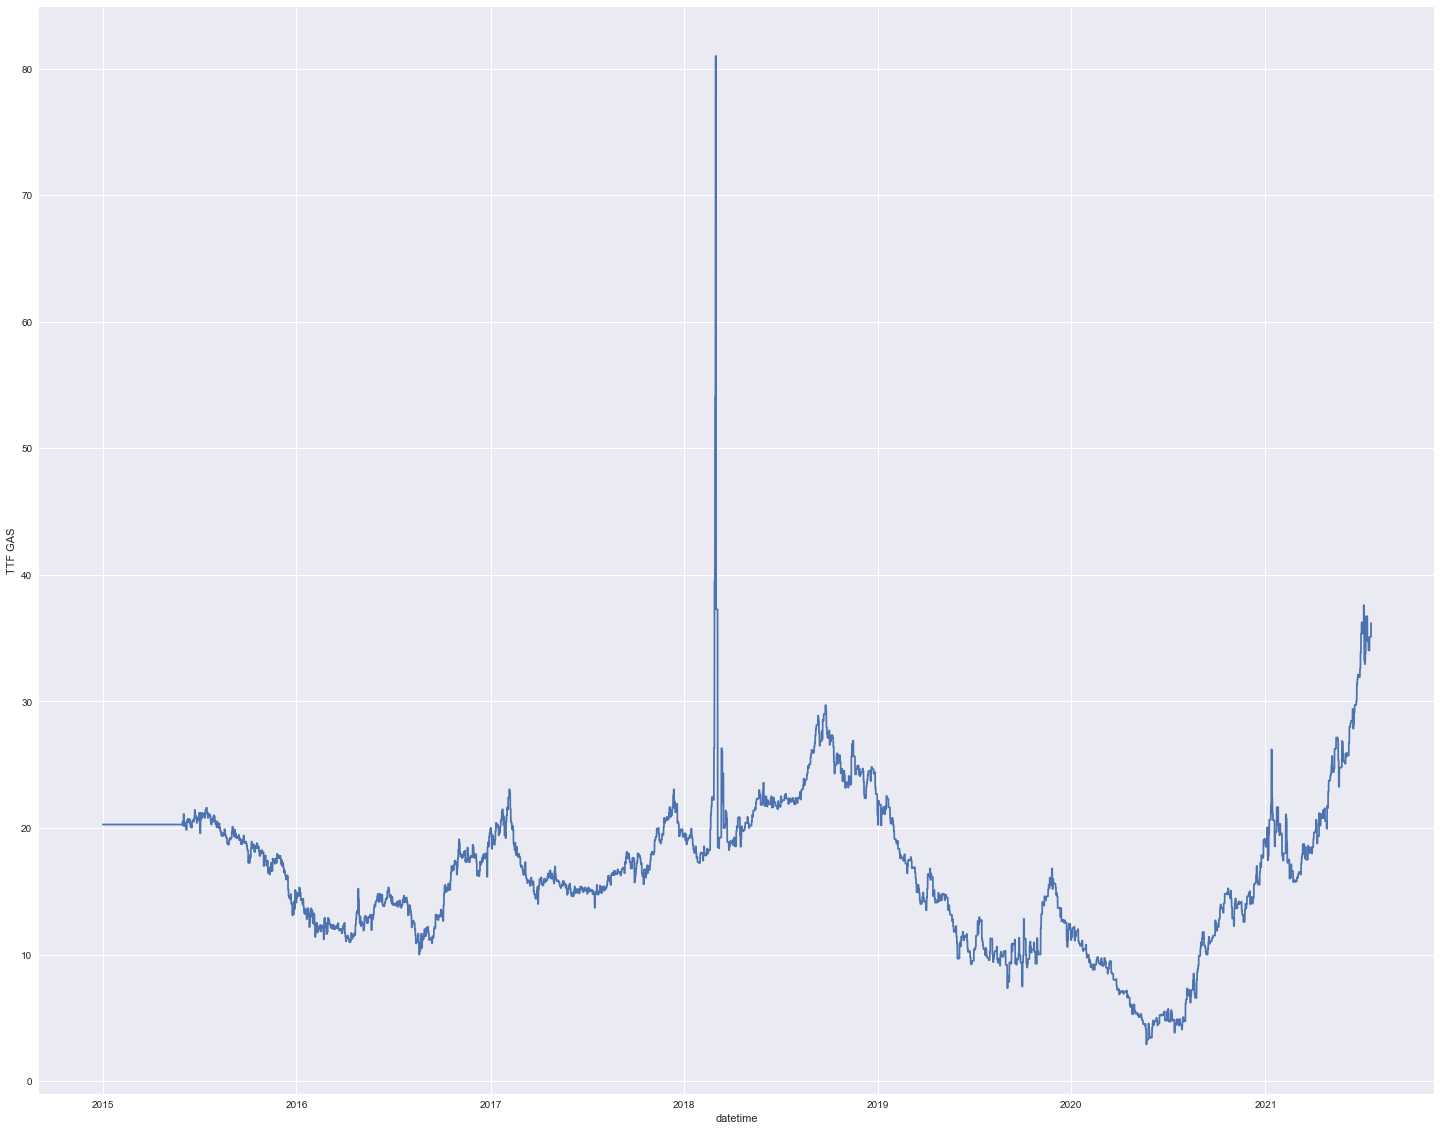

In [116]:
sns.lineplot(data=df_gasttf, x='datetime',y='TTF GAS')

In [117]:
# Hacer una interpolacion / suvizarlo para que no afecte tanto al modelo
# KNN muy lento no recomendado
# Isolation forest lo detectaria como anomalia y lo interpolariamos

The reason for the rise? The Organization of the Petroleum Exporting Countries (OPEC) agreed to cut oil production in November 2016 and that's had a slow-rolling effect on prices going into 2018

# Interconexiones

In [118]:
#Ruta de la carpeta donde se encuentran los csv de REE
Demanda = 'C:\\Users\\Marcos\\Ironhack\\Projects\\Recurrent-Neural-Networks-for-Electricity-Price-Prediction\\Data\\Interconexiones'

#Nos desplazamos a esa carpeta
os.chdir(Demanda)

#Obtenemos una lista con todos los archivos de esa carpeta
csvlists = os.listdir()

In [119]:
#Cargamos el Dataset con las interconexiones
df = pd.read_csv('export_PrevisiónDeLaProducciónEólicaPeninsular_2021-07-20_18_43.csv',sep=';')

df = df[df['name']=='Saldo total interconexiones medidas'][['name','value','datetime']]

df['datetime'] = pd.to_datetime(df['datetime'], utc=True)

df.set_index('datetime',inplace=True)
df.drop('name', axis=1,inplace=True)
df_inter = df.rename(columns={'value':'Saldo Interconexiones'})

<AxesSubplot:xlabel='datetime', ylabel='Saldo Interconexiones'>

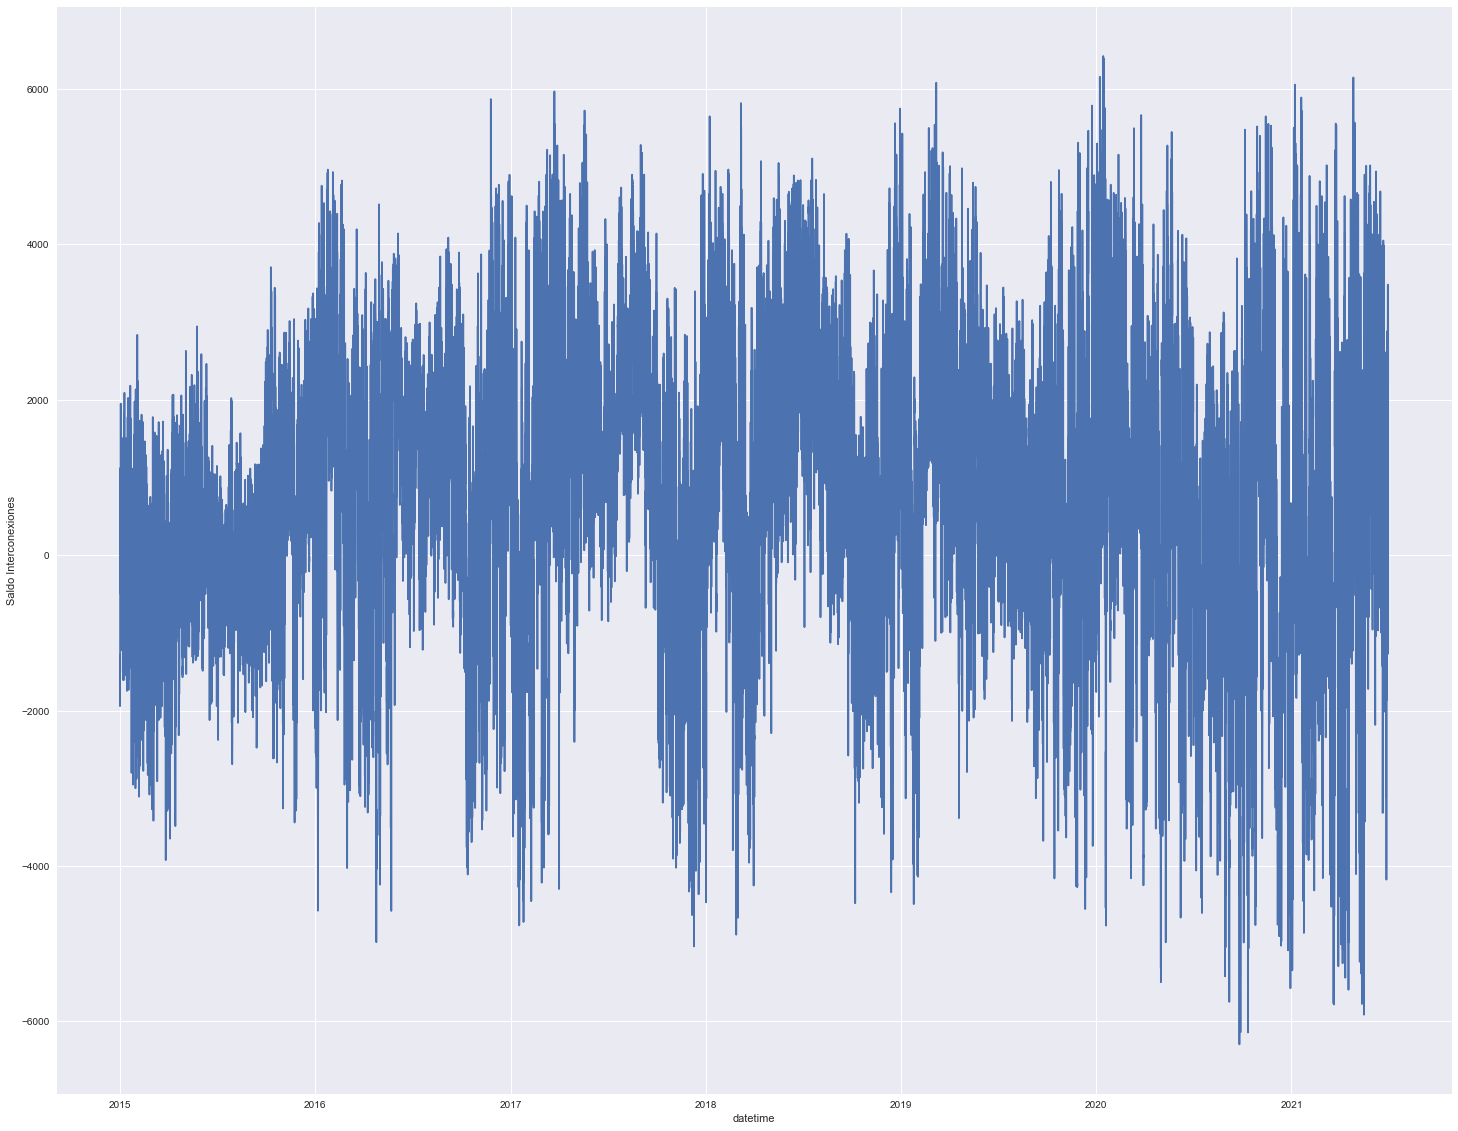

In [120]:
sns.lineplot(data=df_inter, x='datetime',y='Saldo Interconexiones')

# Final Dataset

In [121]:
dates = pd.date_range(start='2015-01-01 00:00:00+00:00', end='2020-12-31 22:00:00+00:00',freq = 'H')
df = pd.DataFrame(index = dates)

dataset_list = [df_produccion,df_eua,df_demanda,df_gasttf,df_inter,df_spot_es]
for dataset in dataset_list:
    df = pd.merge(df, dataset, left_index=True, right_index=True) 

In [122]:
df.head()

Hidráulica    Eólica  Solar Fotovoltaica  \
2015-01-01 00:00:00+00:00    2668.203  5788.224               0.050   
2015-01-01 01:00:00+00:00    2382.211  5368.731               0.045   
2015-01-01 02:00:00+00:00    1690.844  5150.656               0.051   
2015-01-01 03:00:00+00:00    1556.983  4835.700               0.043   
2015-01-01 04:00:00+00:00    1510.068  4497.805               0.074   

                           Solar Térmica  Otras Renovables  \
2015-01-01 00:00:00+00:00         15.815           359.722   
2015-01-01 01:00:00+00:00         15.799           358.945   
2015-01-01 02:00:00+00:00         15.774           351.918   
2015-01-01 03:00:00+00:00          7.862           347.058   
2015-01-01 04:00:00+00:00          0.000           342.252   

                           Residuos Renovables   Nuclear  Turbinación bombeo  \
2015-01-01 00:00:00+00:00              186.340  7107.798              71.806   
2015-01-01 01:00:00+00:00              187.789  7113.883              25.789   
2015-01-01 02:00:00+00:00              186.181  7110.093              82.638   
2015-01-01 03:00:00+00:00              178.637  7110.581             160.241   
2015-01-01 04:00:00+00:00              169.560  7110.582             233.965   

                           Ciclo combinado    Carbón  Fuel-gas  Cogeneración  \
2015-01-01 00:00:00+00:00         3775.267  5004.822       0.0      1527.712   
2015-01-01 01:00:00+00:00         3452.924  4817.315       0.0      1515.046   
2015-01-01 02:00:00+00:00         2907.244  4292.156       0.0      1514.132   
2015-01-01 03:00:00+00:00         2721.058  3923.423       0.0      1513.983   
2015-01-01 04:00:00+00:00         2629.251  3655.118       0.0      1515.884   

                           Residuos no renovables  EUA SPOT  Demanda real  \
2015-01-01 00:00:00+00:00                 149.386      6.99  24511.500000   
2015-01-01 01:00:00+00:00                 148.494      6.99  22866.166667   
2015-01-01 02:00:00+00:00                 151.826      6.99  21392.833333   
2015-01-01 03:00:00+00:00                 147.574      6.99  20319.666667   
2015-01-01 04:00:00+00:00                 148.207      6.99  19923.000000   

                           TTF GAS  Saldo Interconexiones  Price  
2015-01-01 00:00:00+00:00   20.275              -1773.906  48.10  
2015-01-01 01:00:00+00:00   20.275              -1942.838  47.33  
2015-01-01 02:00:00+00:00   20.275              -1165.379  42.27  
2015-01-01 03:00:00+00:00   20.275               -889.173  38.41  
2015-01-01 04:00:00+00:00   20.275               -294.821  35.72

In [123]:
#Guardamos el Dataset con nuestras variables X e Y
df.to_csv(r'C:\\Users\\Marcos\\Ironhack\\Projects\\Recurrent-Neural-Networks-for-Electricity-Price-Prediction\\Data\\dataset.csv', index = True)